In [ ]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer
function mon(array)
    result = Float64[]
    last = array[1]
    for elt in array
      new_last = minimum([elt, last])
      push!(result, new_last)
      last = new_last
    end
    return result
end

In [53]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6 11 16 11],
    ThermalGen = ThermalGen
)
X0 = UT.LP_Relaxation(instance)

4-element Vector{Float64}:
 -51.0
 -55.0
 -54.25
 -53.625

In [54]:
XSAG, ITSAG, SAG = OPT.SAG(instance, X0, 20, 1.)
XBLM, ITBLM, BLM = OPT.BundleLevelMethod(instance, X0, 20, 0.4)

([-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [[-51.0, -55.0, -54.25, -53.625], [854.8575842696666, 1605.7389044943834, 2361.3702247190968, 1607.1139044943839], [-499.99999999997954, 131.34749999988867, 2361.3702247190968, 132.7224999998872], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508]  …  [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749999988867, 2361.3702247190968, -246.91100000004508], [-500.0, 131.34749

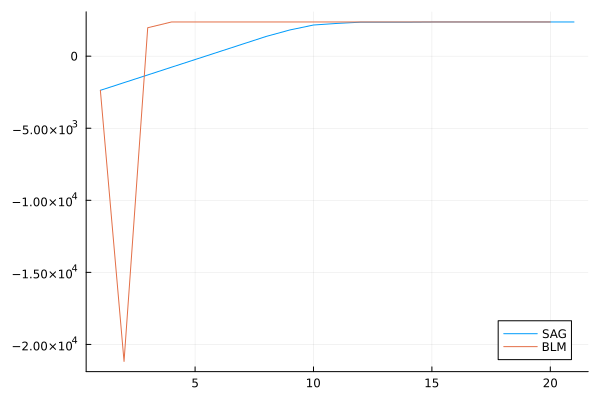

In [55]:
plot(SAG, label = "SAG")
plot!(BLM, label = "BLM")